In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


0
[[  0   0   0   4   0   0   0   0   0   0 162 208 158 158 161 155 156 185 113   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2 144 225 251 206 142 196 165 149 153 174 227 247 133   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0 105 197 230 232 230 217 193 168  82 137 212 208 212 225 234 214 132   0   0   1   0   0]
 [  0   0   0   0   0 146 219 197 211 207 200 202 204 198 184 194 195 189 205 199 194 207 213 120   0   0   0   0]
 [  0   0   0   0   6 218 204 209 192 190 196 197 196 201 205 199 194 192 194 186 197 193 185 184   4   0   0   0]
 [  0   0   0   0 121 227 209 219 198 204 200 203 203 200 195 195 195 192 193 201 195 180 194 201 106   0   0   0]
 [  0   0   0   0 231 216 210 225 188 194 200 205 205 200 194 194 194 196 189 192 177 179 193 193 206   0   0   0]
 [  0   0   0  76 211 207 215 234 197 198 202 205 202 194 192 194 194 194 188 189 167 189 202 188 203  51   0   0]
 [  0   0   0 175 225 208 220 230 201 199 203 205 197 194 194 194 195 190 188 

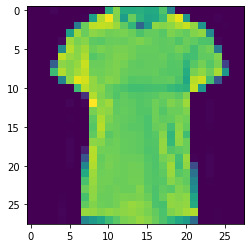

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[66])
print(training_labels[66])
print(training_images[66])

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8629
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8771
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.8860
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8928
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8978
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.2661 - accuracy: 0.9020
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9019


In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8812


[0.34189119935035706, 0.8812000155448914]